<a href="https://colab.research.google.com/github/AN-06/Infosys_Springboard_Python_Internship/blob/main/AirAware_Milestone_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Milestone 1 - Data Collection and Preprocessing



In [1]:
# Import all necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from datetime import datetime
import pickle
import os

# Suppress warnings
warnings.filterwarnings('ignore')

# Set visualization style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

print("All libraries imported successfully!")
print(f"Pandas version: {pd.__version__}")
print(f"NumPy version: {np.__version__}")

All libraries imported successfully!
Pandas version: 2.2.2
NumPy version: 2.0.2


In [2]:
# Create folder structure
os.makedirs('data', exist_ok=True)
os.makedirs('outputs', exist_ok=True)

print("Folders created successfully!")
print("Available folders:", os.listdir())

Folders created successfully!
Available folders: ['.config', 'data', 'outputs', 'sample_data']


In [3]:
# Install Kaggle API
!pip install -q kaggle

# Upload your kaggle.json file
from google.colab import files
print("Please upload your kaggle.json file:")
uploaded = files.upload()

# Setup Kaggle credentials
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Download the dataset
print("\nDownloading World Air Quality dataset...")
!kaggle datasets download -d mexwell/world-air-quality -p data/ --unzip

print("\n✓ Dataset downloaded successfully!")
print("Files in data folder:", os.listdir('data/'))

Please upload your kaggle.json file:


Saving kaggle.json to kaggle.json

Dataset URL: https://www.kaggle.com/datasets/mexwell/world-air-quality
License(s): Attribution 4.0 International (CC BY 4.0)
  0% 0.00/1.63M [00:00<?, ?B/s]
100% 1.63M/1.63M [00:00<00:00, 723MB/s]

✓ Dataset downloaded successfully!
Files in data folder: ['openaq.csv']


In [13]:
# Load dataset in chunks with CORRECT DELIMITER
file_path = 'data/openaq.csv'

print(f"Loading {file_path}...")
print("Detecting delimiter...\n")

# First, check the delimiter
with open(file_path, 'r') as f:
    first_line = f.readline()
    print(f"First line sample: {first_line[:200]}")

    # Detect delimiter
    if ';' in first_line:
        delimiter = ';'
        print("\n✓ Detected delimiter: semicolon (;)")
    elif ',' in first_line:
        delimiter = ','
        print("\n✓ Detected delimiter: comma (,)")
    elif '\t' in first_line:
        delimiter = '\t'
        print("\n✓ Detected delimiter: tab")
    else:
        delimiter = ','
        print("\n⚠ Using default delimiter: comma (,)")

# Load with correct delimiter
print(f"\nLoading data with delimiter '{delimiter}'...")

try:
    df = pd.read_csv(
        file_path,
        sep=delimiter,
        on_bad_lines='skip',
        encoding='utf-8',
        low_memory=False
    )
    print(f"✓ Successfully loaded {len(df)} rows")

except Exception as e:
    print(f"Error: {str(e)}")
    print("\nTrying with engine='python'...")

    df = pd.read_csv(
        file_path,
        sep=delimiter,
        on_bad_lines='skip',
        encoding='utf-8',
        low_memory=False,
        engine='python'
    )

print("="*60)
print("DATASET LOADED SUCCESSFULLY")
print("="*60)
print(f"\nDataset Shape: {df.shape}")
print(f"Number of Rows: {df.shape[0]}")
print(f"Number of Columns: {df.shape[1]}")
print("\n" + "="*60)
print("FIRST FEW ROWS")
print("="*60)
print(df.head(10))
print("\n" + "="*60)
print("DATASET INFO")
print("="*60)
df.info()
print("\n" + "="*60)
print("COLUMN NAMES")
print("="*60)
print(df.columns.tolist())

Loading data/openaq.csv...
Detecting delimiter...

First line sample: ﻿Country Code;City;Location;Coordinates;Pollutant;Source Name;Unit;Value;Last Updated;Country Label


✓ Detected delimiter: semicolon (;)

Loading data with delimiter ';'...
✓ Successfully loaded 54551 rows
DATASET LOADED SUCCESSFULLY

Dataset Shape: (54551, 10)
Number of Rows: 54551
Number of Columns: 10

FIRST FEW ROWS
  Country Code                  City       Location  \
0           BE                   NaN     Escautpont   
1           BG       Teleorman-RNMCA     NET-RO058A   
2           BG  National air network     NET-BG001A   
3           BG  National air network     NET-BG001A   
4           BG  National air network     NET-BG001A   
5           BR        Rio de Janeiro  São Cristóvão   
6           BR             Americana      Americana   
7           BR             São Paulo      Congonhas   
8           BZ                   NaN       Belmopan   
9           CA      BRITISH COLUMBIA        Agassiz   

 

In [19]:
# Analyze data quality issues
print("="*60)
print("DATA QUALITY ASSESSMENT")
print("="*60)

# Missing values
print("\n1. MISSING VALUES:")
print("-" * 40)
missing_values = df.isnull().sum()
missing_percent = (missing_values / len(df)) * 100
missing_df = pd.DataFrame({
    'Column': missing_values.index,
    'Missing_Count': missing_values.values,
    'Missing_Percentage': missing_percent.values
})
missing_df = missing_df[missing_df['Missing_Count'] > 0].sort_values('Missing_Count', ascending=False)
print(missing_df.to_string(index=False))

# Duplicate rows
print(f"\n2. DUPLICATE ROWS: {df.duplicated().sum()}")

# Data types
print("\n3. DATA TYPES:")
print("-" * 40)
print(df.dtypes)

# Basic statistics
print("\n4. BASIC STATISTICS:")
print("-" * 40)
print(df.describe())

# Check for negative values in pollution data
print("\n5. CHECKING FOR NEGATIVE VALUES:")
print("-" * 40)
numeric_cols = df.select_dtypes(include=[np.number]).columns
for col in numeric_cols:
    negative_count = (df[col] < 0).sum()
    if negative_count > 0:
        print(f"{col}: {negative_count} negative values found")

DATA QUALITY ASSESSMENT

1. MISSING VALUES:
----------------------------------------
       Column  Missing_Count  Missing_Percentage
         City          23530           43.133948
  Coordinates            190            0.348298
Country Label            115            0.210812
     Location              2            0.003666

2. DUPLICATE ROWS: 0

3. DATA TYPES:
----------------------------------------
Country Code      object
City              object
Location          object
Coordinates       object
Pollutant         object
Source Name       object
Unit              object
Value            float64
Last Updated      object
Country Label     object
dtype: object

4. BASIC STATISTICS:
----------------------------------------
              Value
count  5.455100e+04
mean   6.171417e+02
std    2.919453e+04
min   -4.905140e+04
25%    1.600000e-01
50%    9.000000e+00
75%    3.070800e+01
max    3.198676e+06

5. CHECKING FOR NEGATIVE VALUES:
----------------------------------------
Value: 67

In [20]:
# Create a copy for cleaning
df_clean = df.copy()

print("="*60)
print("DATA CLEANING - HANDLING MISSING VALUES")
print("="*60)

# Identify date/time column - manually set for this dataset
date_col = 'Last Updated'
print(f"\nUsing date column: {date_col}")

# Convert date column to datetime
df_clean[date_col] = pd.to_datetime(df_clean[date_col], errors='coerce', utc=True)
print(f"✓ Converted '{date_col}' to datetime format")

# Remove timezone for easier processing
df_clean[date_col] = df_clean[date_col].dt.tz_localize(None)

# Sort by date
df_clean = df_clean.sort_values(date_col)
df_clean = df_clean.dropna(subset=[date_col])  # Remove rows with invalid dates
print(f"✓ Data sorted by {date_col}")
print(f"✓ Date range: {df_clean[date_col].min()} to {df_clean[date_col].max()}")

# Strategy for handling missing values
numeric_columns = df_clean.select_dtypes(include=[np.number]).columns

print("\nHandling missing values in numeric columns:")
for col in numeric_columns:
    missing_count = df_clean[col].isnull().sum()
    if missing_count > 0:
        # Use forward fill then backward fill for time series data
        df_clean[col] = df_clean[col].fillna(method='ffill').fillna(method='bfill')

        # If still missing, use median
        if df_clean[col].isnull().sum() > 0:
            df_clean[col] = df_clean[col].fillna(df_clean[col].median())

        print(f"  {col}: Filled {missing_count} missing values")

# Handle missing values in categorical columns
categorical_columns = df_clean.select_dtypes(include=['object']).columns
categorical_columns = [col for col in categorical_columns if col != date_col]

print("\nHandling missing values in categorical columns:")
for col in categorical_columns:
    missing_count = df_clean[col].isnull().sum()
    if missing_count > 0:
        # Fill with 'Unknown' or most frequent value
        df_clean[col] = df_clean[col].fillna('Unknown')
        print(f"  {col}: Filled {missing_count} missing values with 'Unknown'")

print(f"\nRemaining missing values: {df_clean.isnull().sum().sum()}")
print(f"Dataset shape after cleaning: {df_clean.shape}")

DATA CLEANING - HANDLING MISSING VALUES

Using date column: Last Updated
✓ Converted 'Last Updated' to datetime format
✓ Data sorted by Last Updated
✓ Date range: 2014-03-13 12:00:00 to 2024-03-14 13:00:00

Handling missing values in numeric columns:

Handling missing values in categorical columns:
  City: Filled 23530 missing values with 'Unknown'
  Location: Filled 2 missing values with 'Unknown'
  Coordinates: Filled 190 missing values with 'Unknown'
  Country Label: Filled 115 missing values with 'Unknown'

Remaining missing values: 0
Dataset shape after cleaning: (54551, 10)


In [21]:
print("="*60)
print("DATA CLEANING - DUPLICATES & OUTLIERS")
print("="*60)

# Remove duplicates
initial_rows = len(df_clean)
df_clean = df_clean.drop_duplicates()
duplicates_removed = initial_rows - len(df_clean)
print(f"\n1. Duplicates removed: {duplicates_removed}")

# Handle outliers using IQR method
print("\n2. Handling outliers using IQR method:")
print("-" * 40)

numeric_cols = df_clean.select_dtypes(include=[np.number]).columns

for col in numeric_cols:
    Q1 = df_clean[col].quantile(0.25)
    Q3 = df_clean[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 3 * IQR  # Using 3*IQR for less aggressive outlier removal
    upper_bound = Q3 + 3 * IQR

    outliers_count = ((df_clean[col] < lower_bound) | (df_clean[col] > upper_bound)).sum()

    if outliers_count > 0:
        # Cap outliers instead of removing
        df_clean[col] = df_clean[col].clip(lower=lower_bound, upper=upper_bound)
        print(f"  {col}: Capped {outliers_count} outliers")

print(f"\n3. Final dataset shape: {df_clean.shape}")

# Reset index
df_clean = df_clean.reset_index(drop=True)
print("Index reset completed")

DATA CLEANING - DUPLICATES & OUTLIERS

1. Duplicates removed: 0

2. Handling outliers using IQR method:
----------------------------------------
  Value: Capped 5466 outliers

3. Final dataset shape: (54551, 10)
Index reset completed


In [22]:
print("="*60)
print("FEATURE ENGINEERING")
print("="*60)

if date_col:
    # Check if date column is datetime
    if not pd.api.types.is_datetime64_any_dtype(df_clean[date_col]):
        print("Converting date column to datetime...")
        df_clean[date_col] = pd.to_datetime(df_clean[date_col], errors='coerce')
        df_clean = df_clean.dropna(subset=[date_col])

    # Extract time-based features
    df_clean['year'] = df_clean[date_col].dt.year
    df_clean['month'] = df_clean[date_col].dt.month
    df_clean['day'] = df_clean[date_col].dt.day
    df_clean['dayofweek'] = df_clean[date_col].dt.dayofweek
    df_clean['quarter'] = df_clean[date_col].dt.quarter
    df_clean['is_weekend'] = (df_clean['dayofweek'] >= 5).astype(int)
    df_clean['hour'] = df_clean[date_col].dt.hour

    print("Time-based features created:")
    print("  - year, month, day, hour")
    print("  - dayofweek (0=Monday, 6=Sunday)")
    print("  - quarter")
    print("  - is_weekend")

    # For this dataset, we'll use 'Value' as target and create pivot table
    # This dataset is in long format (one row per pollutant measurement)
    print("\n⚠ Dataset is in LONG format (one row per pollutant)")
    print("Converting to WIDE format (one row per timestamp/location)...")

    # Create a pivot table
    df_pivot = df_clean.pivot_table(
        index=[date_col, 'Location', 'City', 'Country Code'],
        columns='Pollutant',
        values='Value',
        aggfunc='mean'
    ).reset_index()

    print(f"✓ Pivoted shape: {df_pivot.shape}")
    print(f"✓ Pollutants as columns: {[col for col in df_pivot.columns if col not in [date_col, 'Location', 'City', 'Country Code']]}")

    # Re-add time features
    df_pivot['year'] = df_pivot[date_col].dt.year
    df_pivot['month'] = df_pivot[date_col].dt.month
    df_pivot['day'] = df_pivot[date_col].dt.day
    df_pivot['dayofweek'] = df_pivot[date_col].dt.dayofweek
    df_pivot['quarter'] = df_pivot[date_col].dt.quarter
    df_pivot['is_weekend'] = (df_pivot['dayofweek'] >= 5).astype(int)
    df_pivot['hour'] = df_pivot[date_col].dt.hour

    # Drop rows with too many missing pollutants
    df_pivot = df_pivot.dropna(thresh=len(df_pivot.columns) * 0.5)  # Keep rows with at least 50% data

    # Fill remaining missing values with forward fill
    pollutant_cols = [col for col in df_pivot.columns if col not in [date_col, 'Location', 'City', 'Country Code', 'year', 'month', 'day', 'dayofweek', 'quarter', 'is_weekend', 'hour']]

    for col in pollutant_cols:
        df_pivot[col] = df_pivot[col].fillna(method='ffill').fillna(method='bfill').fillna(0)

    # Use pivoted dataframe
    df_clean = df_pivot.copy()

    print(f"\nFinal shape after pivoting: {df_clean.shape}")
    print(f"Columns: {df_clean.columns.tolist()}")

    # Create lag features for main pollutants (if they exist)
    main_pollutants = ['PM2.5', 'PM10', 'O3', 'NO2', 'SO2', 'CO']
    available_pollutants = [p for p in main_pollutants if p in df_clean.columns]

    if available_pollutants:
        target_pollutant = available_pollutants[0]
        print(f"\nCreating lag features for {target_pollutant}:")

        for lag in [1, 7]:
            df_clean[f'{target_pollutant}_lag_{lag}'] = df_clean[target_pollutant].shift(lag)
            print(f"  - {target_pollutant}_lag_{lag}")

        # Create rolling mean features
        for window in [7, 14]:
            df_clean[f'{target_pollutant}_rolling_mean_{window}'] = df_clean[target_pollutant].rolling(window=window).mean()
            print(f"  - {target_pollutant}_rolling_mean_{window}")

    # Drop rows with NaN created by lag/rolling features
    df_clean = df_clean.dropna()

    print(f"\nFinal shape after feature engineering: {df_clean.shape}")
else:
    print("Skipping time-based feature engineering - no date column found")

FEATURE ENGINEERING
Time-based features created:
  - year, month, day, hour
  - dayofweek (0=Monday, 6=Sunday)
  - quarter
  - is_weekend

⚠ Dataset is in LONG format (one row per pollutant)
Converting to WIDE format (one row per timestamp/location)...
✓ Pivoted shape: (15997, 17)
✓ Pollutants as columns: ['BC', 'CO', 'NO', 'NO2', 'NOX', 'O3', 'PM1', 'PM10', 'PM2.5', 'RELATIVEHUMIDITY', 'SO2', 'TEMPERATURE', 'UM003']

Final shape after pivoting: (15997, 24)
Columns: ['Last Updated', 'Location', 'City', 'Country Code', 'BC', 'CO', 'NO', 'NO2', 'NOX', 'O3', 'PM1', 'PM10', 'PM2.5', 'RELATIVEHUMIDITY', 'SO2', 'TEMPERATURE', 'UM003', 'year', 'month', 'day', 'dayofweek', 'quarter', 'is_weekend', 'hour']

Creating lag features for PM2.5:
  - PM2.5_lag_1
  - PM2.5_lag_7
  - PM2.5_rolling_mean_7
  - PM2.5_rolling_mean_14

Final shape after feature engineering: (15984, 28)


EXPLORATORY DATA ANALYSIS


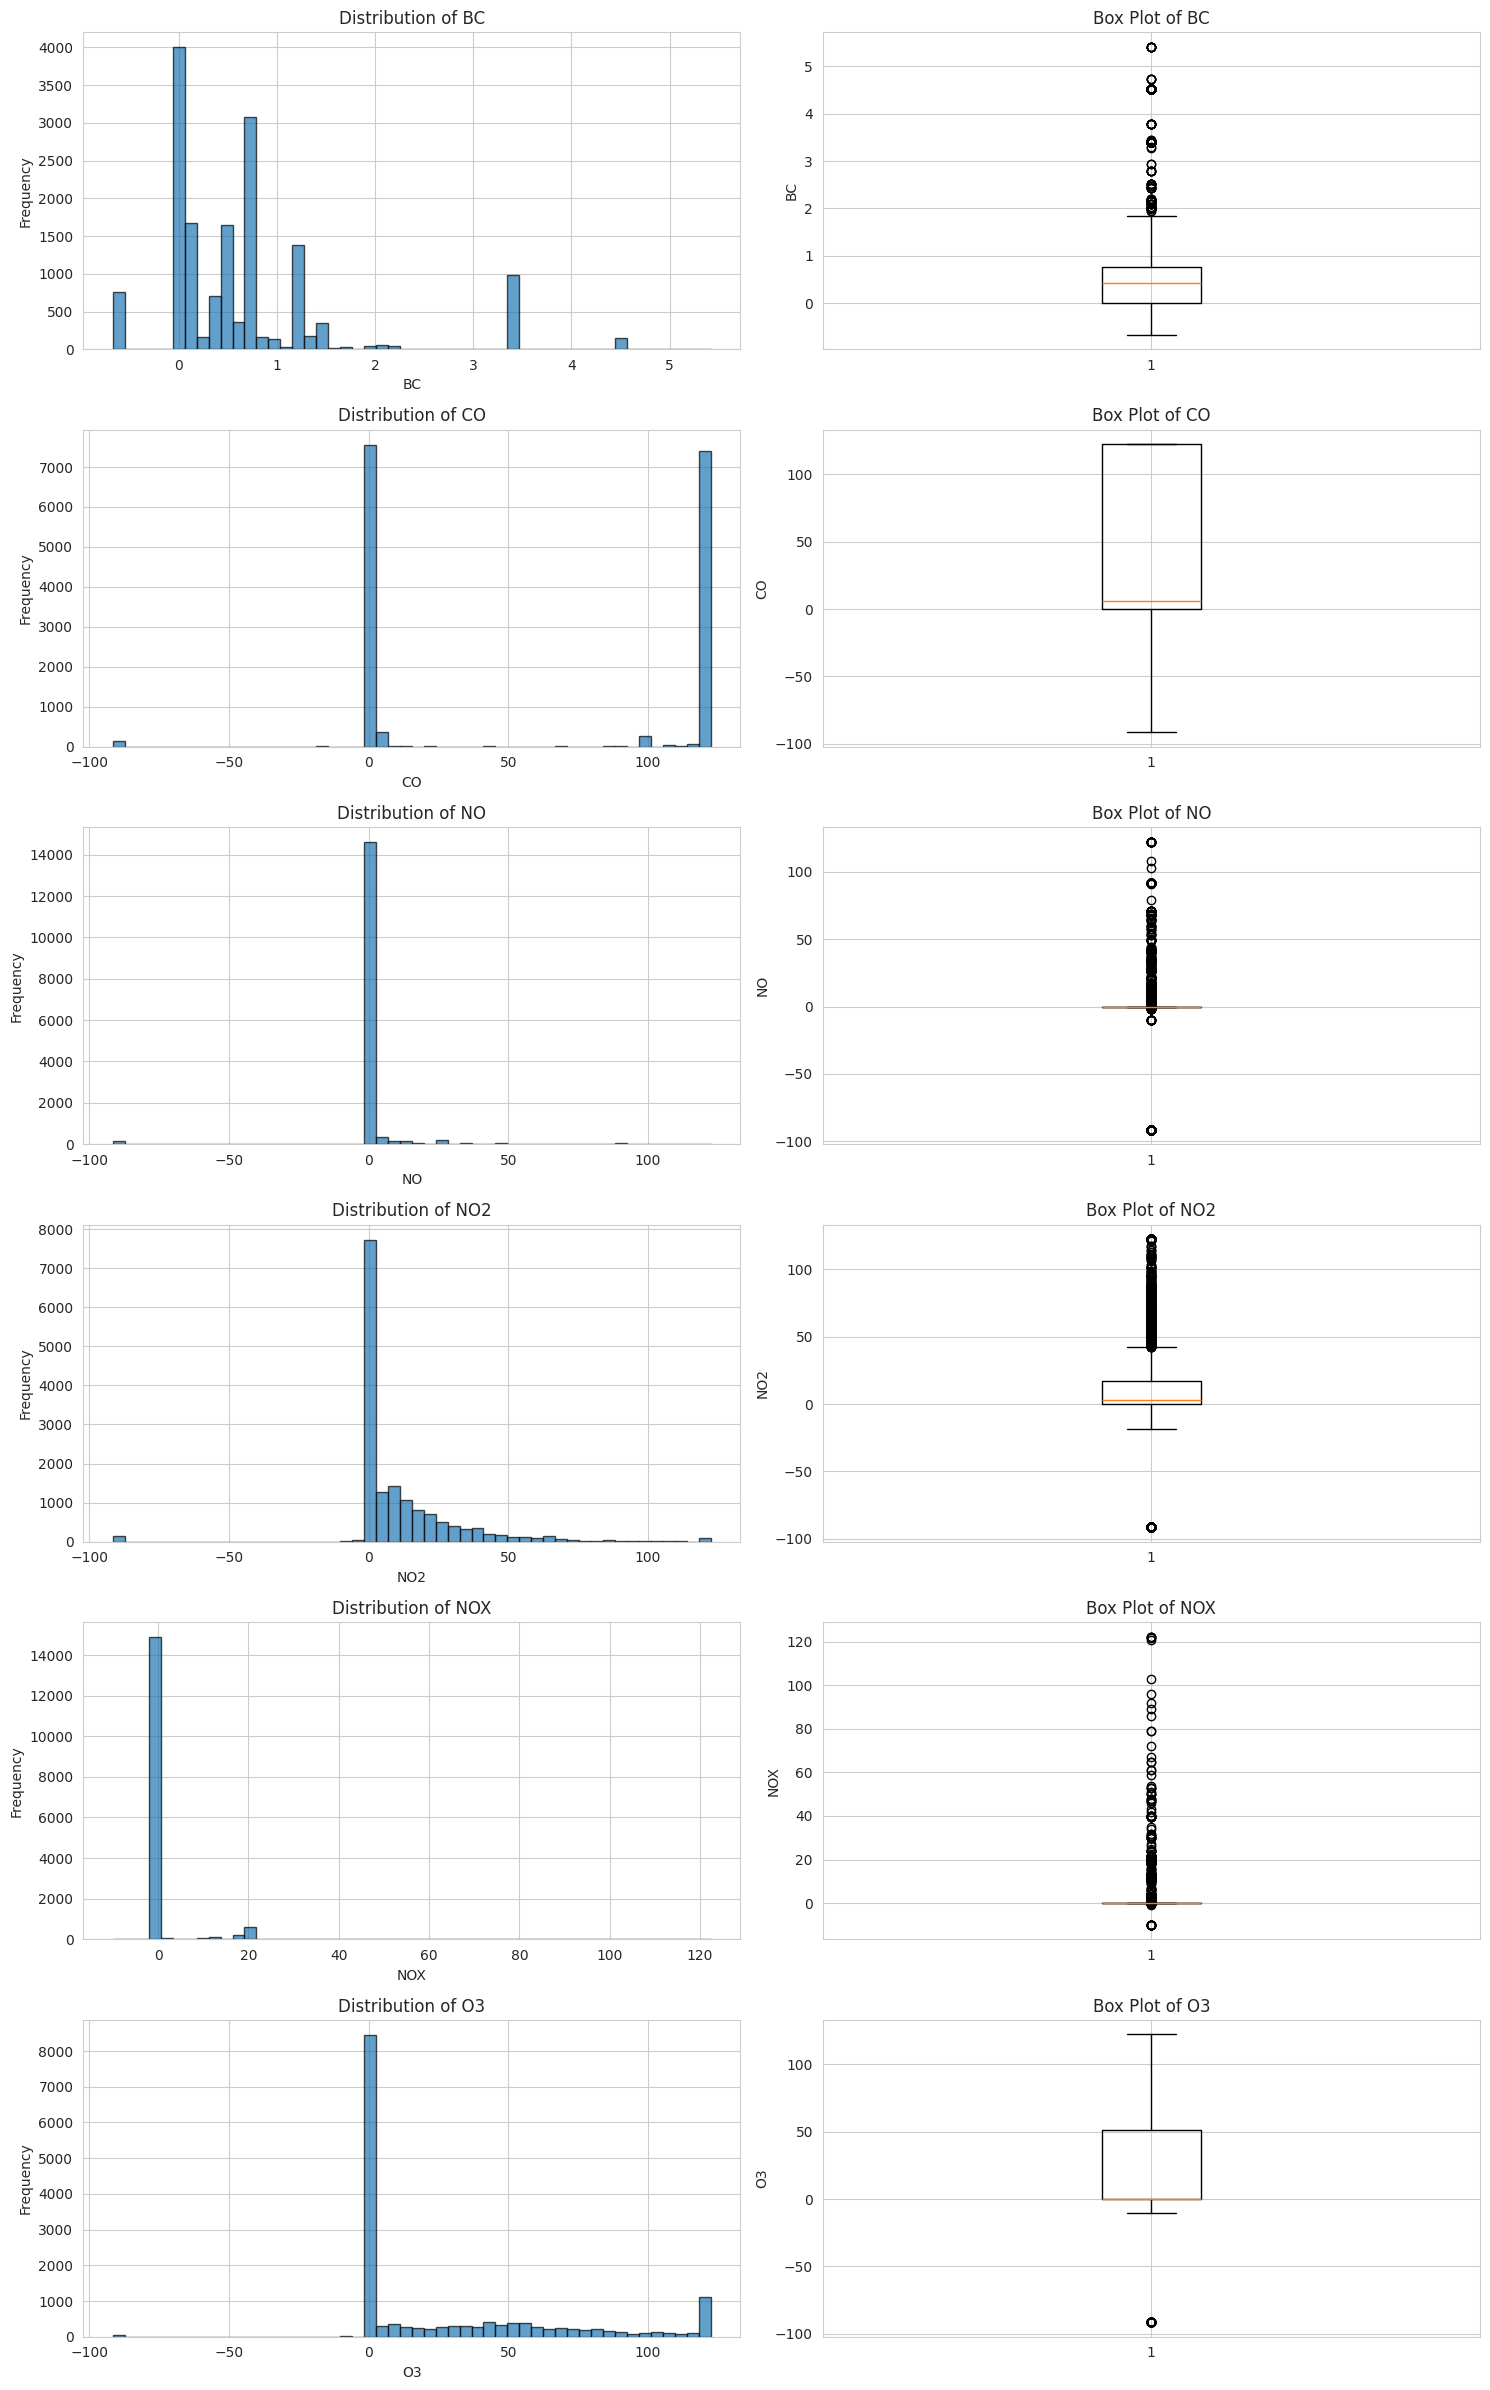

Distribution analysis completed and saved!


In [23]:
print("="*60)
print("EXPLORATORY DATA ANALYSIS")
print("="*60)

# Select numeric columns for analysis
numeric_cols = df_clean.select_dtypes(include=[np.number]).columns
pollutant_cols = [col for col in numeric_cols if col not in ['year', 'month', 'day', 'dayofweek', 'quarter', 'is_weekend']]

# Distribution plots
n_cols_to_plot = min(len(pollutant_cols), 6)
fig, axes = plt.subplots(n_cols_to_plot, 2, figsize=(15, 4*n_cols_to_plot))

if n_cols_to_plot == 1:
    axes = axes.reshape(1, -1)

for idx, col in enumerate(pollutant_cols[:n_cols_to_plot]):
    # Histogram
    axes[idx, 0].hist(df_clean[col].dropna(), bins=50, edgecolor='black', alpha=0.7)
    axes[idx, 0].set_title(f'Distribution of {col}')
    axes[idx, 0].set_xlabel(col)
    axes[idx, 0].set_ylabel('Frequency')

    # Box plot
    axes[idx, 1].boxplot(df_clean[col].dropna())
    axes[idx, 1].set_title(f'Box Plot of {col}')
    axes[idx, 1].set_ylabel(col)

plt.tight_layout()
plt.savefig('outputs/distribution_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

print("Distribution analysis completed and saved!")

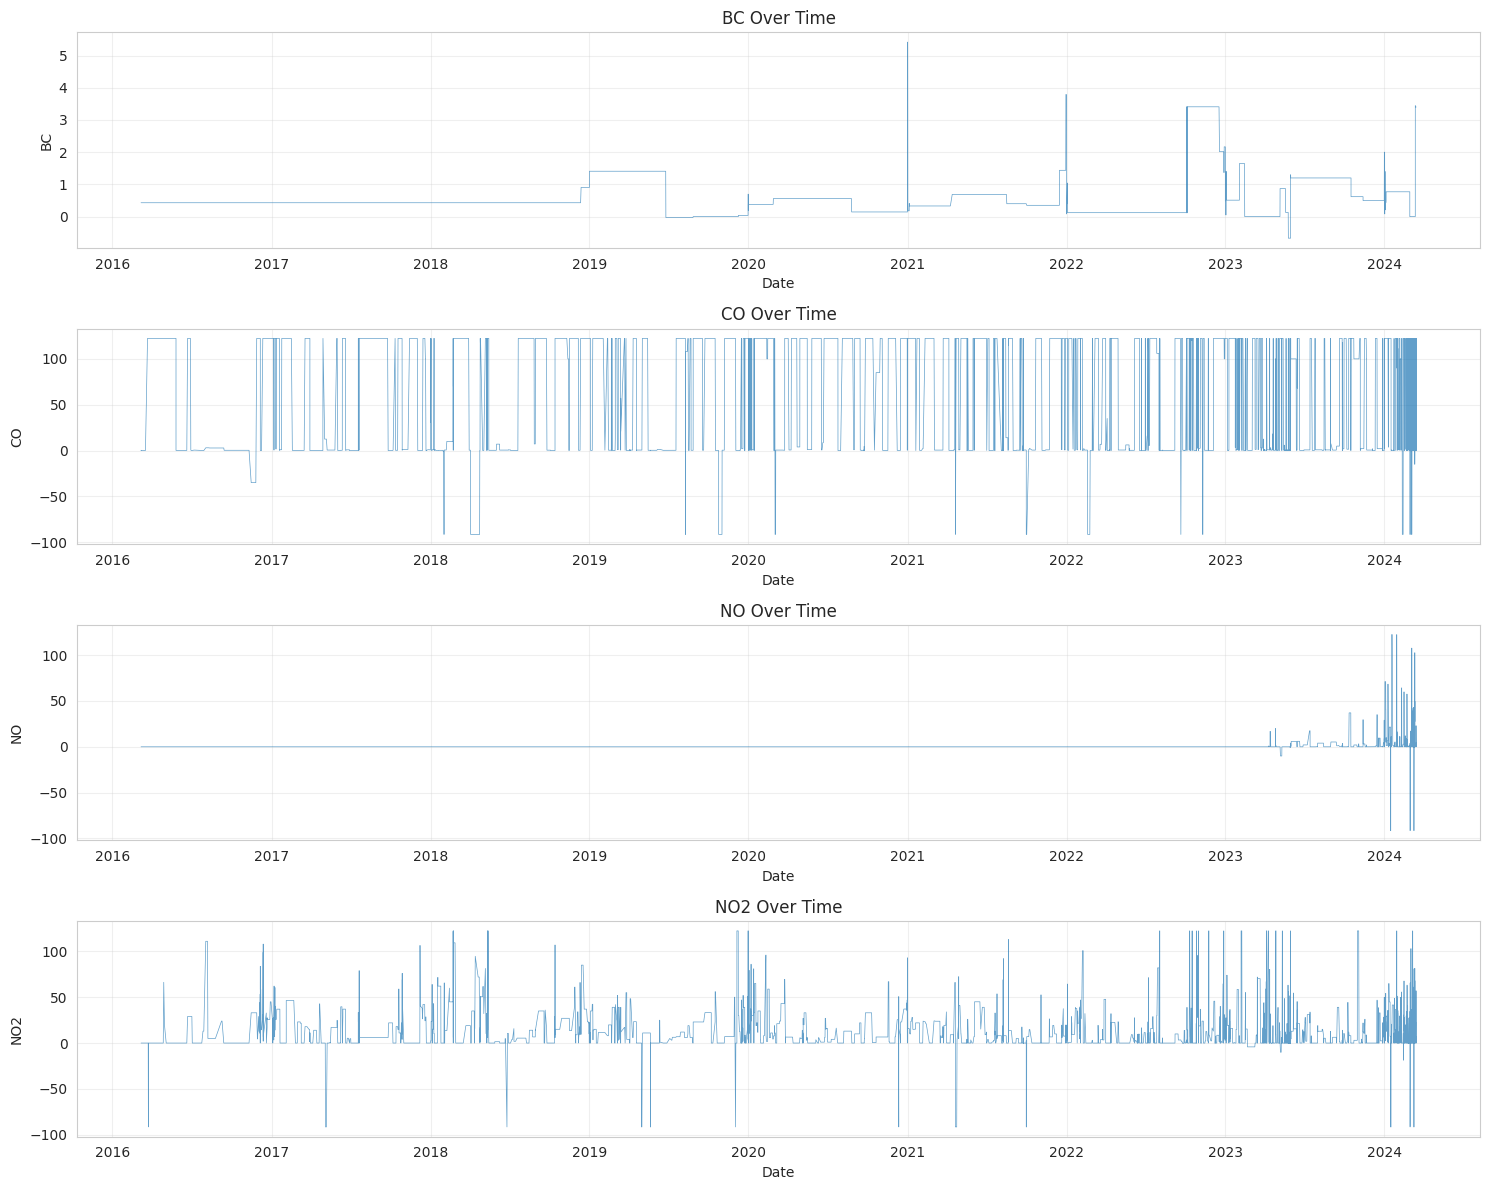

Time series analysis completed and saved!


In [24]:
# Time series plots
if date_col:
    n_cols_to_plot = min(len(pollutant_cols), 4)
    fig, axes = plt.subplots(n_cols_to_plot, 1, figsize=(15, 3*n_cols_to_plot))

    if n_cols_to_plot == 1:
        axes = [axes]

    for idx, col in enumerate(pollutant_cols[:n_cols_to_plot]):
        axes[idx].plot(df_clean[date_col], df_clean[col], linewidth=0.5, alpha=0.7)
        axes[idx].set_title(f'{col} Over Time')
        axes[idx].set_xlabel('Date')
        axes[idx].set_ylabel(col)
        axes[idx].grid(True, alpha=0.3)

    plt.tight_layout()
    plt.savefig('outputs/time_series_plots.png', dpi=300, bbox_inches='tight')
    plt.show()

    print("Time series analysis completed and saved!")
else:
    print("Skipping time series plots - no date column available")

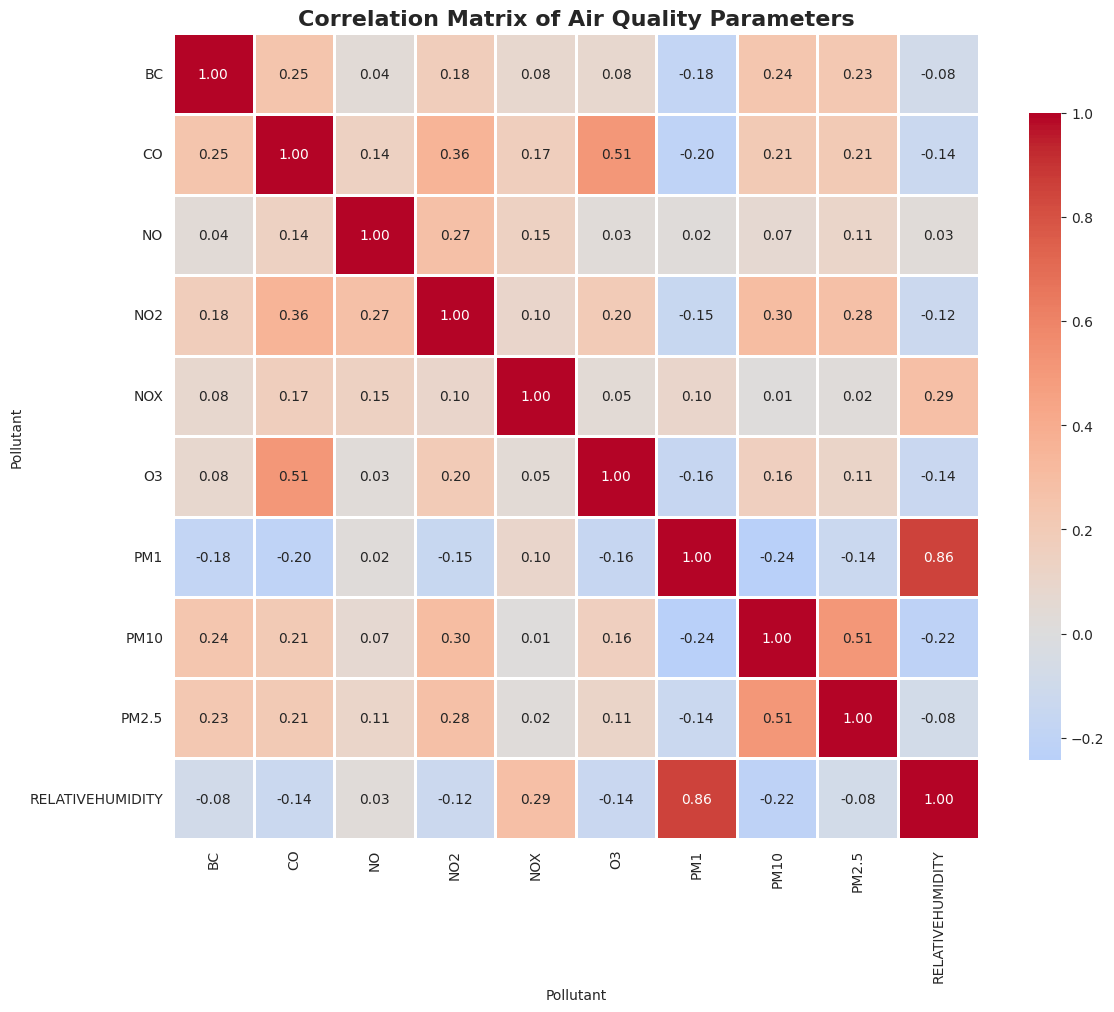

Correlation analysis completed and saved!

Highly correlated pairs (|correlation| > 0.7):
--------------------------------------------------
PM1 <-> RELATIVEHUMIDITY: 0.858


In [25]:
# Correlation matrix
correlation_cols = pollutant_cols[:10]  # Limit to first 10 for readability
corr_matrix = df_clean[correlation_cols].corr()

# Plot correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0,
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix of Air Quality Parameters', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.savefig('outputs/correlation_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

print("Correlation analysis completed and saved!")
print("\nHighly correlated pairs (|correlation| > 0.7):")
print("-" * 50)
for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        if abs(corr_matrix.iloc[i, j]) > 0.7:
            print(f"{corr_matrix.columns[i]} <-> {corr_matrix.columns[j]}: {corr_matrix.iloc[i, j]:.3f}")

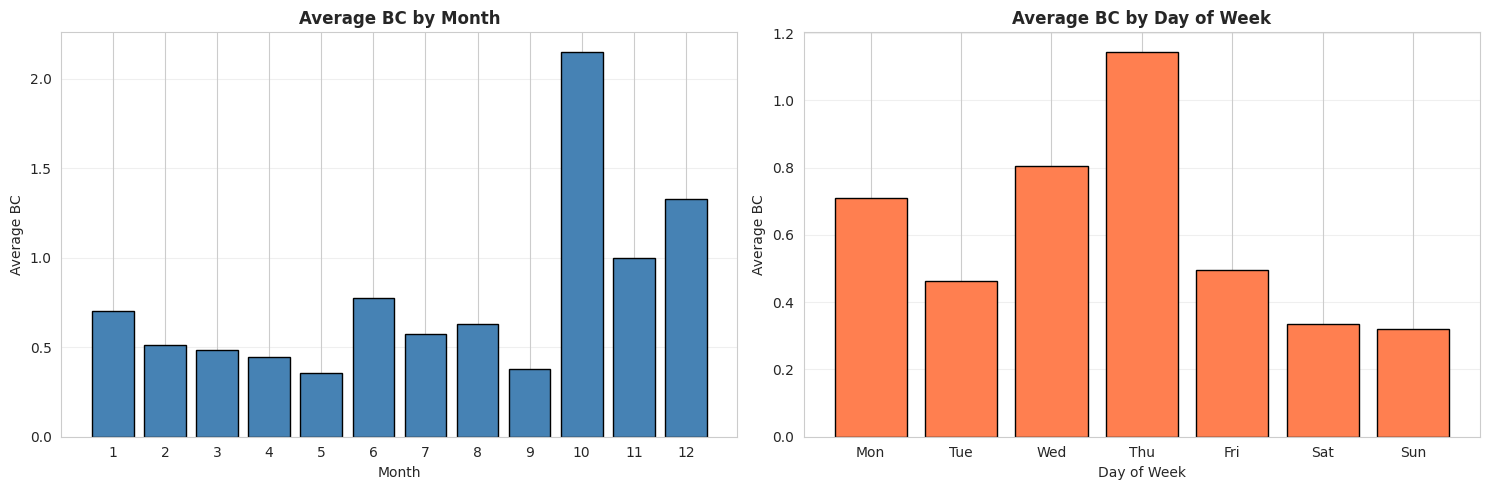

Seasonal pattern analysis completed and saved!


In [26]:
# Monthly and seasonal patterns
if 'month' in df_clean.columns and len(pollutant_cols) > 0:
    target_col = pollutant_cols[0]  # Use first pollutant column

    fig, axes = plt.subplots(1, 2, figsize=(15, 5))

    # Monthly average
    monthly_avg = df_clean.groupby('month')[target_col].mean()
    axes[0].bar(monthly_avg.index, monthly_avg.values, color='steelblue', edgecolor='black')
    axes[0].set_title(f'Average {target_col} by Month', fontweight='bold')
    axes[0].set_xlabel('Month')
    axes[0].set_ylabel(f'Average {target_col}')
    axes[0].set_xticks(range(1, 13))
    axes[0].grid(axis='y', alpha=0.3)

    # Day of week pattern
    if 'dayofweek' in df_clean.columns:
        dow_avg = df_clean.groupby('dayofweek')[target_col].mean()
        day_names = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
        axes[1].bar(range(7), dow_avg.values, color='coral', edgecolor='black')
        axes[1].set_title(f'Average {target_col} by Day of Week', fontweight='bold')
        axes[1].set_xlabel('Day of Week')
        axes[1].set_ylabel(f'Average {target_col}')
        axes[1].set_xticks(range(7))
        axes[1].set_xticklabels(day_names)
        axes[1].grid(axis='y', alpha=0.3)

    plt.tight_layout()
    plt.savefig('outputs/seasonal_patterns.png', dpi=300, bbox_inches='tight')
    plt.show()

    print("Seasonal pattern analysis completed and saved!")

In [28]:
print("="*60)
print("SAVING CLEANED DATASET")
print("="*60)

# Save cleaned dataset
df_clean.to_csv('data/cleaned_air_quality_data.csv', index=False)
print(f"✓ Cleaned dataset saved: data/cleaned_air_quality_data.csv")
print(f"   Shape: {df_clean.shape}")
print(f"   Columns: {len(df_clean.columns)}")

# Save metadata for Notebook 2
metadata = {
    'date_col': date_col,
    'dataset_shape': df_clean.shape,
    'columns': df_clean.columns.tolist(),
    'date_range': {
        'start': str(df_clean[date_col].min()),
        'end': str(df_clean[date_col].max())
    }
}

import pickle
with open('data/metadata.pkl', 'wb') as f:
    pickle.dump(metadata, f)

print("✓ Metadata saved: data/metadata.pkl")

print("\n" + "="*60)
print("EDA COMPLETED - READY FOR MODEL TRAINING")
print("="*60)
print("\n📋 Summary:")
print(f"  • Total records: {len(df_clean)}")
print(f"  • Total features: {len(df_clean.columns)}")
print(f"  • Date column: {date_col}")
print(f"  • Date range: {df_clean[date_col].min()} to {df_clean[date_col].max()}")
print(f"\n✅ Cleaned data saved successfully!")
#print(f"✅ Ready to start Notebook 2 for model training")

SAVING CLEANED DATASET
✓ Cleaned dataset saved: data/cleaned_air_quality_data.csv
   Shape: (15984, 28)
   Columns: 28
✓ Metadata saved: data/metadata.pkl

EDA COMPLETED - READY FOR MODEL TRAINING

📋 Summary:
  • Total records: 15984
  • Total features: 28
  • Date column: Last Updated
  • Date range: 2016-03-06 17:00:00 to 2024-03-14 13:00:00

✅ Cleaned data saved successfully!


In [29]:
# Download cleaned data as ZIP
!zip -r cleaned_data.zip data/cleaned_air_quality_data.csv data/metadata.pkl outputs/

from google.colab import files
files.download('cleaned_data.zip')

print("\n✅ Download started!")
print("📦 Upload 'cleaned_data.zip' to Notebook 2")

  adding: data/cleaned_air_quality_data.csv (deflated 85%)
  adding: data/metadata.pkl (deflated 27%)
  adding: outputs/ (stored 0%)
  adding: outputs/correlation_matrix.png (deflated 15%)
  adding: outputs/time_series_plots.png (deflated 10%)
  adding: outputs/seasonal_patterns.png (deflated 30%)
  adding: outputs/distribution_analysis.png (deflated 30%)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


✅ Download started!
📦 Upload 'cleaned_data.zip' to Notebook 2
